### Sprint 11 - Aprenentatge no supervisat

#### - Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means


In [245]:
# import libraries
import pandas as pd 
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt 
from pandas import DataFrame
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns', None)
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [246]:
from sklearn.preprocessing import OrdinalEncoder

In [247]:
from mpl_toolkits.mplot3d.axes3d import get_test_data

In [248]:
import kneed
from kneed import KneeLocator

In [249]:
# open dataset 
data = pd.read_csv('Publicacions Facebook Thailandia.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [250]:
data['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.3+ KB


Veiem que les columnes Column1, column2, Column3 i Column4 només contenen NaN, així doncs les eliminarem del dataset.

Informació sobre cada columna:: 

+ status_id: id de la publicació.                   
+ status_type: Tipus de publicació.       
+ status_published: Data i hora de la publicació.  
+ num_reactions: Número de reaccions a la publicació.      
+ num_comments: Número de comentaris sobre la publicació.        
+ num_shares: Número de vegades que ha sigut compartida la publicació.          
+ num_likes: Número de likes de la publicació.           
+ num_loves: Número de loves de la publicació.           
+ num_wows: Número de wows de la publicació.             
+ num_haha: Número de hahas de la publicació.            
+ num_sads: Número de sads de la publicació.             
+ num_angrys: Número de angrys de la publicació.           

#### Preprocessat de les dades 

eliminarem les columnes que només contenen NaNs.

In [252]:
cols = ['Column1', 'Column2', 'Column3', 'Column4']
data.drop(cols, axis = 1, inplace= True)

In [253]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [254]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["video", "photo", "status", "link"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(data[["status_type"]])
data["categoria"] = encoder.transform(data[["status_type"]])

A continuació convertirem les dades categòriques de la columna Status_type en numériques per poder treballar amb elles.
Això ho farem mitjançant la codificació one-hot que no estableix un ordre jearàrquic.

In [255]:
# Eliminems la columna original status_type
#  data = data.drop(columns=['status_type'])
data = data.drop(['status_type'], axis = 1)

In [256]:
data['categoria'] = data['categoria'].apply(int)

In [257]:
data.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria
0,246675545449582_1649696485147474,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0
1,246675545449582_1649426988507757,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,246675545449582_1648730588577397,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,246675545449582_1645700502213739,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


In [258]:
data['categoria'].value_counts()

1    4288
0    2334
2     365
3      63
Name: categoria, dtype: int64

A continuació Transformarem les columnes published_data i published_time de format de data i hora a format numéric de manera que poguem treballar amb elles.

In [259]:
data['status_published'] =  pd.to_datetime(data['status_published'], format='%m/%d/%Y %H:%M')

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
status_id           7050 non-null object
status_published    7050 non-null datetime64[ns]
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
categoria           7050 non-null int64
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 661.0+ KB


In [261]:
# converting the current date
# in datetime64 format

datetime64 = data['status_published']
 
'''# converting date time into second timestamp
ts = (date64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's')
 
print("Printing the converted datetime in Timestamp in seconds:", ts)
 
# converting date time into minute timestamp
tm = (date64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 'm')
 
print("Printing the converted datetime in Timestamp in minutes:", ts)'''
 
# converting date time into hour timestamp
th = (datetime64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 'h')
 
#print("Printing the converted datetime in Timestamp in hour:", th)

# converting date time into minute timestamp
#tm = (time64 - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 'm')
 
#print("Printing the converted time in Timestamp in minutes:", tm)

In [262]:
data['status_published'] = th

In [263]:
data.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria
0,246675545449582_1649696485147474,423438.000000,529,512,262,432,92,3,1,1,0,0
1,246675545449582_1649426988507757,423430.750000,150,0,0,150,0,0,0,0,0,1
2,246675545449582_1648730588577397,423414.283333,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,423410.483333,111,0,0,111,0,0,0,0,0,1
4,246675545449582_1645700502213739,423339.366667,213,0,0,204,9,0,0,0,0,1


A continuació dividirem la columna status_id que es compon de dos series de números separats per un guió, en dos columnes diferents. La primera columna correspondrà a la id de l'usuari que ha fet la publicació, doncs es repeteix en nombroses ocasions, i el segón número a la id de la publicació en qüestió.

In [264]:
status = data["status_id"].str.split('_', expand=True)
status.columns = ['status_user_id', 'status_post_id']

In [ ]:
data = pd.concat([status, data], axis=1)

Eliminem la columa status_id i visualitzem el datafram amb les dues columnes noves qeu acabem de crear a partir del status_id.

In [266]:
data = data.drop(['status_id'], axis = 1)

In [267]:
data.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria
0,246675545449582,1649696485147474,423438.000000,529,512,262,432,92,3,1,1,0,0
1,246675545449582,1649426988507757,423430.750000,150,0,0,150,0,0,0,0,0,1
2,246675545449582,1648730588577397,423414.283333,227,236,57,204,21,1,1,0,0,0
3,246675545449582,1648576705259452,423410.483333,111,0,0,111,0,0,0,0,0,1
4,246675545449582,1645700502213739,423339.366667,213,0,0,204,9,0,0,0,0,1


Eliminem tots aquells registres que estiguin duplicats.

In [268]:
data = data.drop_duplicates()

Comprovem que ens ha eliminat 51 registres duplicats.

In [269]:
data.count()

status_user_id      6999
status_post_id      6999
status_published    6999
num_reactions       6999
num_comments        6999
num_shares          6999
num_likes           6999
num_loves           6999
num_wows            6999
num_hahas           6999
num_sads            6999
num_angrys          6999
categoria           6999
dtype: int64

In [78]:
#data.duplicated()

Veiem que hi ha 9 usuaris diferents al dataframe.

In [270]:
data['status_user_id'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: status_user_id, dtype: int64

In [271]:
data['status_user_id'] = pd.to_numeric(data['status_user_id'])
data['status_post_id'] = pd.to_numeric(data['status_post_id'])

In [272]:
data['status_user_id'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: status_user_id, dtype: int64

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
status_user_id      6999 non-null int64
status_post_id      6999 non-null int64
status_published    6999 non-null float64
num_reactions       6999 non-null int64
num_comments        6999 non-null int64
num_shares          6999 non-null int64
num_likes           6999 non-null int64
num_loves           6999 non-null int64
num_wows            6999 non-null int64
num_hahas           6999 non-null int64
num_sads            6999 non-null int64
num_angrys          6999 non-null int64
categoria           6999 non-null int64
dtypes: float64(1), int64(12)
memory usage: 765.5 KB


Ara farem un resum de les dades estadístiques del nostre dataframe.

In [274]:
data.describe()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria
count,6.999000e+03,6.999000e+03,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,4.496236e+14,7.197095e+14,410914.306432,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159,0.735962
std,3.083144e+14,4.188569e+14,16639.320767,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582,0.592424
min,1.170599e+14,1.341166e+14,372866.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.466755e+14,2.711886e+14,404835.083333,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.466755e+14,7.269181e+14,419689.066667,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.148557e+14,9.295081e+14,422311.375000,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.050855e+15,1.653424e+15,424681.200000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,3.000000


A continuació escalarem les dades amb StandardScaler ja que d'aquesta manera totes les variables tindran la mateixa mitjana i la mateixa desviació estàndard, excloent les categories, doncs ens interessa conservar les dades originals que ens indiquen quin tipus de publicació és cada registre.

In [275]:
scaler = StandardScaler()

In [276]:
columnes = data[['status_user_id', 'status_post_id', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
scaled = scaler.fit_transform(columnes)

In [277]:
data_sc = DataFrame(scaled)

In [278]:
data_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.658297,2.220456,0.752710,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999
1,-0.658297,2.219813,0.752275,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
2,-0.658297,2.218150,0.751285,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999
3,-0.658297,2.217783,0.751056,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
4,-0.658297,2.210915,0.746782,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999


In [279]:
data_sc.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
count,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.08,-1.40,-2.29,-0.50,-0.25,-0.30,-0.48,-0.32,-0.14,-0.18,-0.16,-0.16
25%,-0.66,-1.07,-0.37,-0.46,-0.25,-0.30,-0.44,-0.32,-0.14,-0.18,-0.16,-0.16
50%,-0.66,0.02,0.53,-0.37,-0.25,-0.30,-0.35,-0.32,-0.14,-0.18,-0.16,-0.16
75%,0.54,0.50,0.68,-0.02,-0.23,-0.27,-0.06,-0.24,-0.14,-0.18,-0.16,-0.16
max,1.95,2.23,0.83,9.90,23.26,25.63,10.24,16.06,31.72,39.36,34.28,44.86


A continuació normalitzarem aquestes dades escalades.

In [280]:
scaler = MinMaxScaler()

In [281]:
columnes_sc = data_sc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
scaled = scaler.fit_transform(columnes_sc)

In [282]:
data_nm = DataFrame(scaled)

In [283]:
data_nm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [284]:
data_nm.columns = ['status_user_id', 'status_post_id', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data_nm.columns
data_nm.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [285]:
data_nm['categoria'] = data['categoria'].apply(int)

In [394]:
data_nm.describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria
count,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6948.00
mean,0.36,0.39,0.73,0.05,0.01,0.01,0.04,0.02,0.00,0.00,0.00,0.00,0.73
std,0.33,0.28,0.32,0.10,0.04,0.04,0.09,0.06,0.03,0.03,0.03,0.02,0.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.09,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.14,0.39,0.90,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.53,0.52,0.95,0.05,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00


Ara veurem el nombre de publicacions de cada tipus de categoria:

In [400]:
data['categoria'].value_counts()

1    4244
0    2333
2     359
3      63
Name: categoria, dtype: int64

Per escollir les dades amb les que treballarem primer descartarem les columnes que representen id, doncs son identificadors únics que encara que son numérics no son quantitatius.
També treuem la columna de categoria, doncs aquesta columna ja ens agrupa les dades per categories i el que volem és precisament veure altres tipus d'agrupacions de les dades.

Com hem vist al resum de les dades estadístiques, les columnes num_loves, num_wows, num_hahas, num_sads i num_angrys son poc representatives així que també les descartem.

A continuació veurem la distribució de les dades de la resta de columnes.

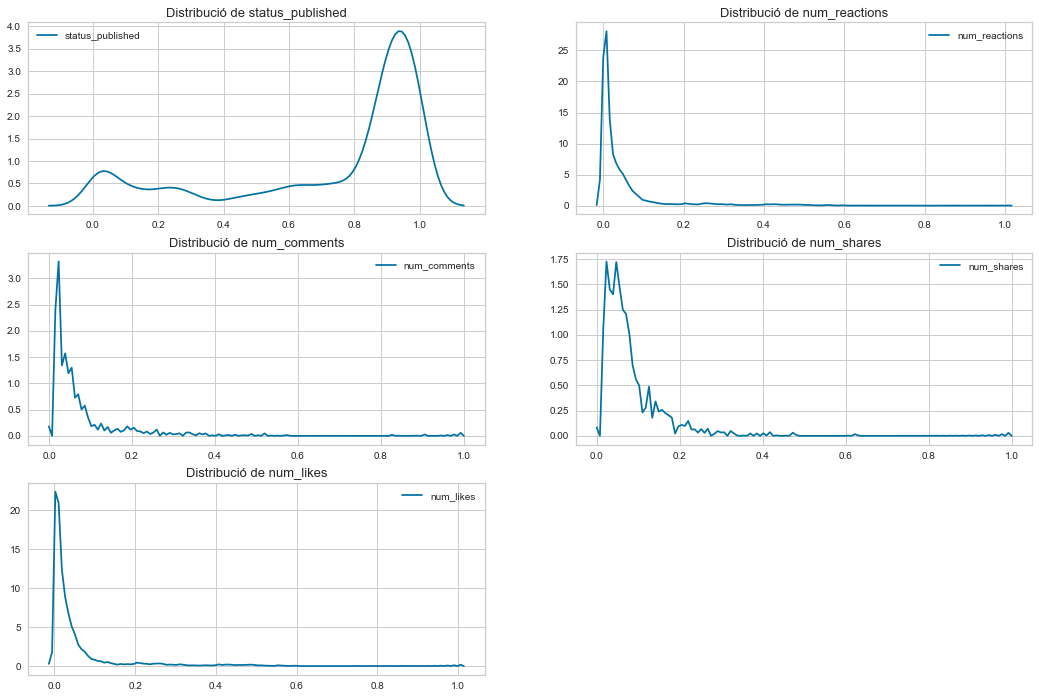

In [416]:
fig = plt.figure(figsize=(18,12))

plt.subplot(321)
sns.kdeplot(data_nm['status_published'])
plt.title('Distribució de status_published', fontsize = 13)

plt.subplot(322)
sns.kdeplot(data_nm['num_reactions'])
plt.title('Distribució de num_reactions', fontsize = 13)

plt.subplot(323)
sns.kdeplot(data_nm['num_comments'])
plt.title('Distribució de num_comments', fontsize = 13)

plt.subplot(324)
sns.kdeplot(data_nm['num_shares'])
plt.title('Distribució de num_shares', fontsize = 13)

plt.subplot(325)
sns.kdeplot(data_nm['num_likes'])
plt.title('Distribució de num_likes', fontsize = 13)

plt.show()

Veiem que aquelles columnes que presenten una distribució més normal son les de número de reactions, comments, shares i likes. així que descartem la columna status_published.

d'aquestes 4 columnes que han quedat farem servir num_reactions, num_comments i num_shares.

In [290]:
data_nm.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0


In [291]:
data_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
status_user_id      6999 non-null float64
status_post_id      6999 non-null float64
status_published    6999 non-null float64
num_reactions       6999 non-null float64
num_comments        6999 non-null float64
num_shares          6999 non-null float64
num_likes           6999 non-null float64
num_loves           6999 non-null float64
num_wows            6999 non-null float64
num_hahas           6999 non-null float64
num_sads            6999 non-null float64
num_angrys          6999 non-null float64
categoria           6948 non-null float64
dtypes: float64(13)
memory usage: 710.9 KB


A continuació veurem gràficament com es distribueixen les variables que hem seleccionat segons el tipus de categoria.

Las categories es divideixen de la següent manera:
+ Categoria 0 = Video
+ Categoria 1 = Photo
+ Categoria 2 = Text
+ Categoria 3 = Link

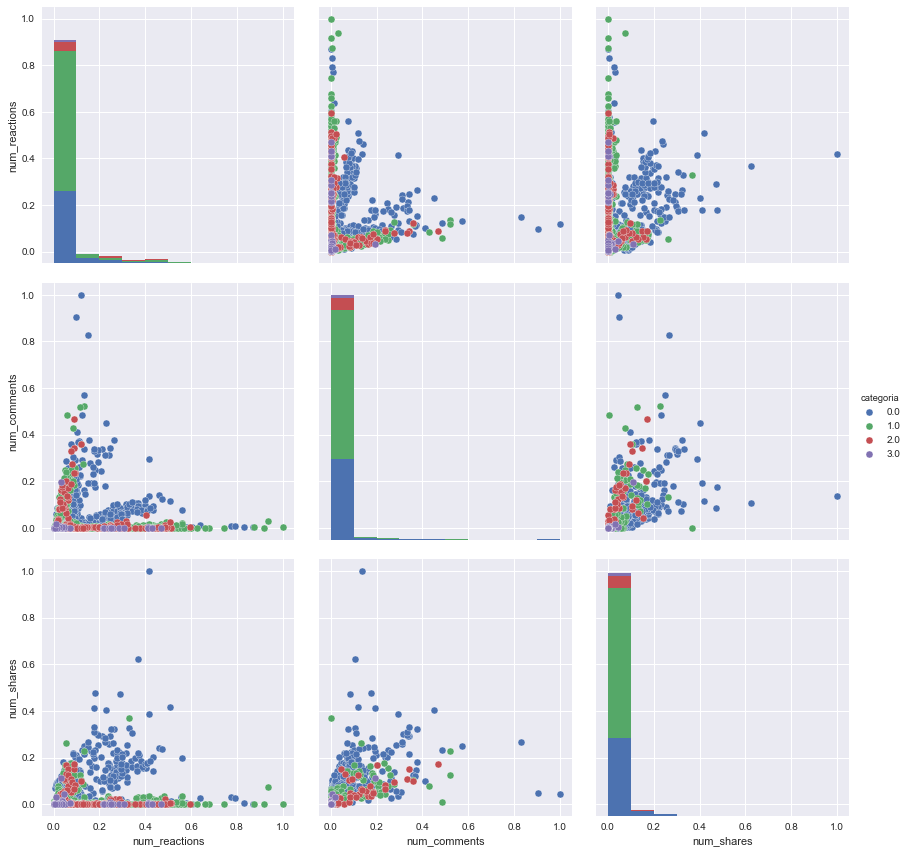

In [204]:
sns.pairplot(data_nm.dropna(), hue='categoria',size=4,vars=["num_reactions","num_comments","num_shares"],kind='scatter')

En aquestes gràfiques podem veure que no hi ha agrupacions diferenciades de dades segons la categoria, a excepció de la categoria 0, que pertany a video, on si veiem que conforma en algunes gràfiques un grup diferenciat de la resta. 

In [292]:
X = np.array(data_nm[["num_reactions","num_comments","num_shares"]])
y = np.array(data['categoria'])
X.shape
y.shape

(6999,)

Finalment farem una gràfica 3D amb les 3 variables per veure si aconseguim identificar agrupacions diferenciades de dades.

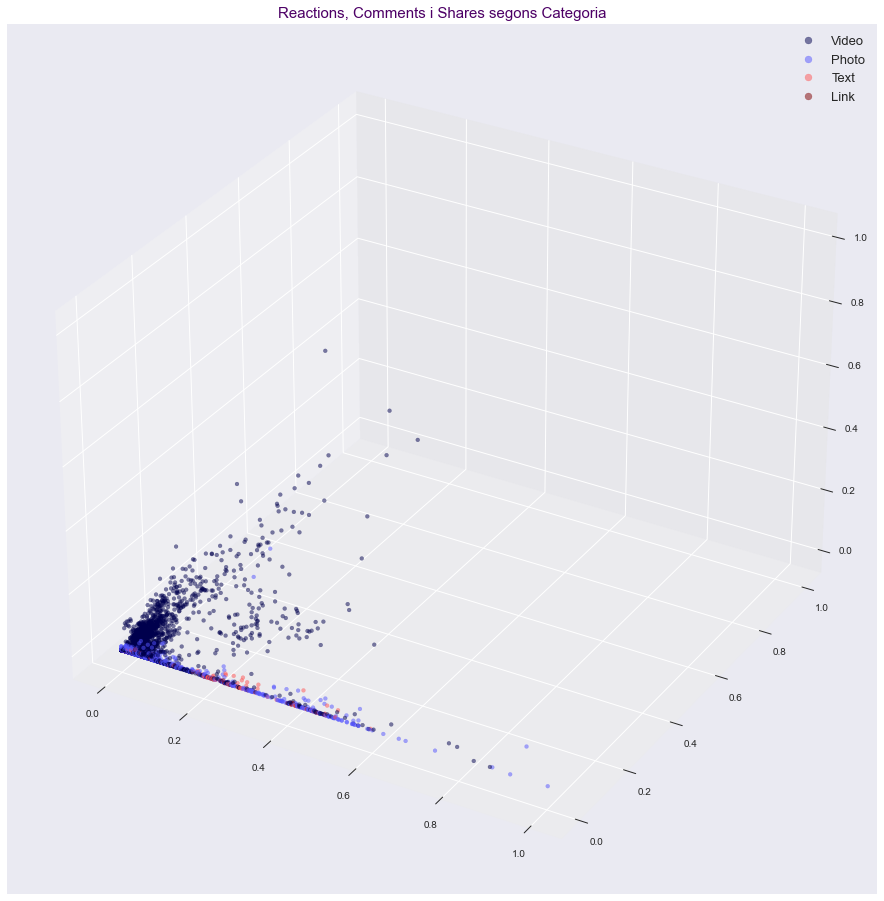

In [293]:
fig = plt.figure(figsize= (16,16))

ax = fig.add_subplot(projection = '3d')
cm = plt.cm.get_cmap('seismic')

plot = ax.scatter(data_nm["num_reactions"],data_nm["num_comments"],data_nm["num_shares"], c= data['categoria'], cmap=cm, s=15, alpha = 0.5)
plt.legend(handles = plot.legend_elements()[0], labels = ['Video', 'Photo', 'Text', 'Link'], prop={'size': 13})

plt.title('Reactions, Comments i Shares segons Categoria', fontsize= 15, color= '#4d0066')
plt.show()

Com podem veure en aquesta gràfica, no es diferencien grups clars, així que farem servir a continuació l'algoritme K-means per intentar agrupar les dades.

### Model Building


#### K- means Clustering

Ara mirarem d'obtenir el número de clusters mitjançant el mètode elbow.

In [295]:
inertia = []
sse = {}
for n in range (1,12): 
    algorithm = KMeans(n_clusters= n, init = 'k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    sse[n] = algorithm.inertia_

In [296]:
kn = KneeLocator(x=list(sse.keys()), 
             y=list(sse.values()), 
             curve='convex', 
             direction='decreasing')
print('Optimal k: ', round(kn.knee, 2))

Optimal k:  3


Ens indica que el número òptim de clusters serien 3. Veiem-ho en una gràfica.

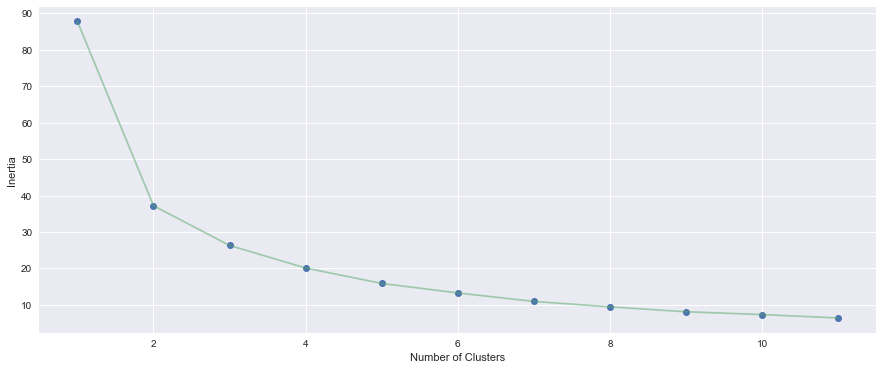

In [297]:
# elbow method 
plt.figure(1, figsize= (15,6))
plt.plot(np.arange(1 , 12) , inertia , 'o')
plt.plot(np.arange(1 , 12) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Comprovem que el número de clusters hauria de ser 3 perquè és on la corva s'aplana.

A continuació executem l'algoritme K-Means amb el número de clusters indicat.

In [298]:
kmeans3 = KMeans(n_clusters= 3, max_iter= 150, random_state= 42)
kmeans3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [54]:
centroids = kmeans3.cluster_centers_
print(centroids)

[[0.02320552 0.00451702 0.00622275]
 [0.10453727 0.2035487  0.14733117]
 [0.3621213  0.01405017 0.03000813]]


In [299]:
# Creem una nova columna amb la predicció dels clusters a un nou dataset.
clusters3 = data_nm.copy()
clusters3['Cluster_pred'] = kmeans3.fit_predict(X)

In [300]:
clusters3.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0


In [302]:
clusters3.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0


Mirem el nombre de dades a cada cluster.

In [303]:
clusters3.Cluster_pred.value_counts()

0    6342
2     460
1     197
Name: Cluster_pred, dtype: int64

Veiem que està força descompensat, amb molta diferència entre tots 3 clusters.

A continuació farem una gràfica 3D per visualitzar les dades en els 3 clusters. 

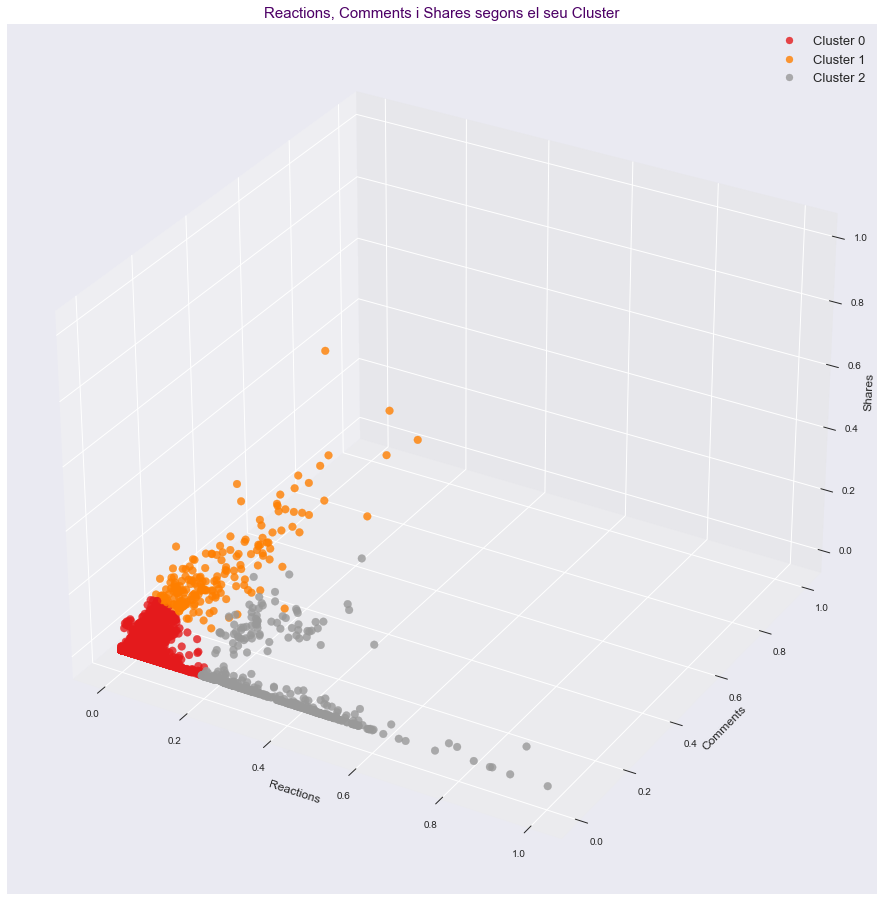

In [356]:
preds= clusters3['Cluster_pred']

cm = plt.cm.get_cmap('Set1')
fig = plt.figure(figsize= (16,16))

ax = fig.add_subplot(projection = '3d')


plot = ax.scatter(data_nm["num_reactions"],data_nm["num_comments"],data_nm["num_shares"], c= preds,alpha=0.8,s=60, cmap=cm)
plt.legend(handles = plot.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.xlabel("Reactions", fontsize = 12)
plt.ylabel("Comments", fontsize = 12)
ax.set_zlabel("Shares", fontsize = 12)
plt.title('Reactions, Comments i Shares segons el seu Cluster', fontsize= 15, color= '#4d0066')
plt.show()




Podem veure la distribució dels clústers entre les 3 variables escollides. Veiem que el clúster 1, tot i ser el més petit en nombre d'observacions, és el que sembla ser el més gran. Això pot ser degut al fet que les seves observacions estan més disperses.

A vegades és més fàcil veure-ho en 2 dimensions, així que farem gràfiques de les variables relacionades entre elles. 

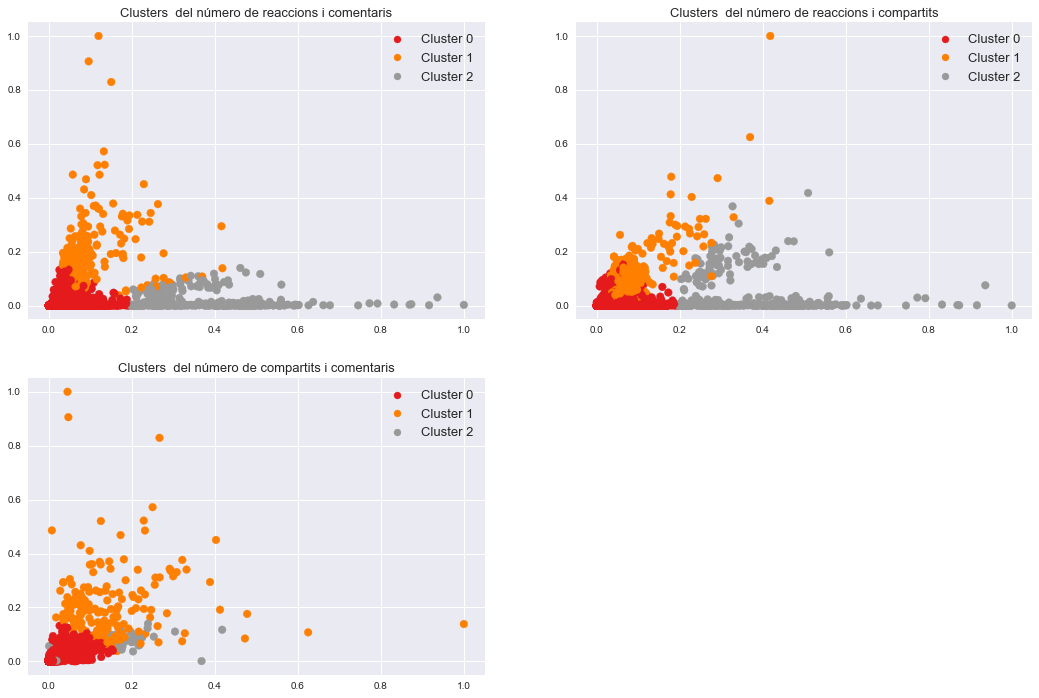

In [100]:
fig = plt.figure(figsize=(18,12))

plt.subplot(221)
plot1 = plt.scatter(x = data_nm['num_reactions'], y = data_nm['num_comments'], c= preds,s=60, cmap=cm)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i comentaris', fontsize = 13)

plt.subplot(222)
plot2 = plt.scatter(x = data_nm['num_reactions'], y = data_nm['num_shares'], c= preds,s=60, cmap=cm)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i compartits', fontsize = 13)

plt.subplot(223)
plot3 = plt.scatter(x = data_nm['num_shares'], y = data_nm['num_comments'], c= preds,s=60, cmap=cm)
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de compartits i comentaris', fontsize = 13)

plt.show()

Veiem que la distribució i agrupació dels clusters es força semblant a la gràfica 3D. Podem veure que el cluster 0, el que té el major nombre d'observacions, està molt concentrat, semblant més petit, mentres que el cluster 1 presenta una major dispersió donant la sensació de ser més gran del que realment és. 

#### Resum estadístic de cada Cluster.

A continuació anem a  veure un resum de les estadístiques de cada cluster per veure les diferències: 

In [304]:
clusters3[clusters3['Cluster_pred'] == 0].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred
count,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6342.00,6308.00,6342.0
mean,0.35,0.38,0.74,0.02,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.73,0.0
std,0.33,0.28,0.33,0.03,0.01,0.02,0.03,0.03,0.01,0.02,0.03,0.02,0.57,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,0.14,0.09,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,0.14,0.37,0.91,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,0.0
75%,0.53,0.53,0.95,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,1.00,0.0
max,1.00,1.00,1.00,0.19,0.13,0.15,0.19,0.33,0.10,0.65,1.00,1.00,3.00,0.0


In [305]:
clusters3[clusters3['Cluster_pred'] == 1].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,182.00,197.0
mean,0.66,0.58,0.92,0.10,0.20,0.15,0.08,0.16,0.02,0.04,0.04,0.03,0.43,1.0
std,0.40,0.34,0.06,0.07,0.14,0.11,0.06,0.12,0.05,0.04,0.05,0.04,0.70,0.0
min,0.02,0.03,0.74,0.03,0.04,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,1.0
25%,0.53,0.34,0.88,0.06,0.11,0.08,0.04,0.07,0.00,0.01,0.02,0.00,0.00,1.0
50%,1.00,0.79,0.92,0.08,0.18,0.13,0.06,0.13,0.01,0.03,0.04,0.00,0.00,1.0
75%,1.00,0.84,0.98,0.12,0.25,0.17,0.09,0.22,0.02,0.06,0.06,0.03,1.00,1.0
max,1.00,1.00,1.00,0.42,1.00,1.00,0.37,0.77,0.50,0.27,0.45,0.16,3.00,1.0


In [306]:
clusters3[clusters3['Cluster_pred'] == 2].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred
count,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,458.00,460.0
mean,0.27,0.43,0.62,0.36,0.01,0.03,0.35,0.07,0.03,0.02,0.01,0.01,0.90,2.0
std,0.24,0.10,0.23,0.13,0.03,0.06,0.14,0.16,0.11,0.07,0.04,0.03,0.79,0.0
min,0.02,0.05,0.21,0.20,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,2.0
25%,0.14,0.39,0.46,0.26,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.00,2.0
50%,0.14,0.44,0.53,0.33,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.00,2.0
75%,0.65,0.46,0.95,0.45,0.01,0.01,0.44,0.01,0.01,0.00,0.00,0.00,1.00,2.0
max,1.00,1.00,1.00,1.00,0.14,0.42,1.00,1.00,1.00,1.00,0.73,0.26,3.00,2.0


A partir del resum de les dades estadístiques veurem quines caracteristiques té cada cluster: 

#### Cluster 0: 

+ Es el grup que té de lluny més observacions, un 90% del total. 
+ La mitjana dels comentaris, reaccions i shares es molt baixa, sent 0 en quan als comentaris.
+ al 50% de les observacions les variables anteriorment esmentades el resultat es 0.


#### Cluster 1: 

+ Aquest grup és el segon més petit amb diferència, amb un 2.8% de les observacions.
+ La mitjana dels comentaris, reaccions i shares es força més alta que al cluster anterior, i cap dona un resultat de 0.
+ al 50% de les observacions cap de les variables dona 0.


#### Cluster 2: 

+ Es el segon grup més nombrós, a motla distància però del primer, amb un 6.5% del total.
+ La mitjana de les reaccions és la més alta de tots 3 clusters, però els comentaris i els shares son inferiors als del cluster 1 i superiors al del 0.
+ Al 50% de les observacions en els comentaris i els shares el resultat es 0, tal i com succeeix al cluster 0. En quant a les reaccions té el resultat més elevat de tot 3 clusters. 

#### Analisi gràfic dels clusters

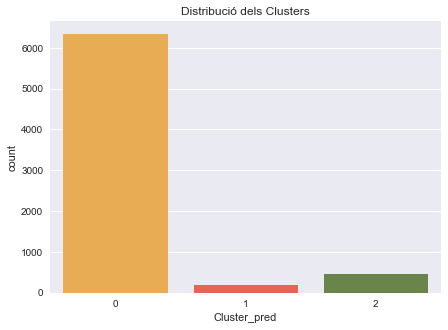

In [314]:
plt.figure(figsize = (7,5))
pal = ['#ffb13c', '#ff503c', '#698f3f']
pl = sns.countplot(x=clusters3['Cluster_pred'], palette= pal)
pl.set_title("Distribució dels Clusters")
plt.show()

Com ja hem vist, la divisió de clústers no s'ha fet de manera equitativa. 

Ara veurem com es distribueixen les diferents categories en cada cluster.

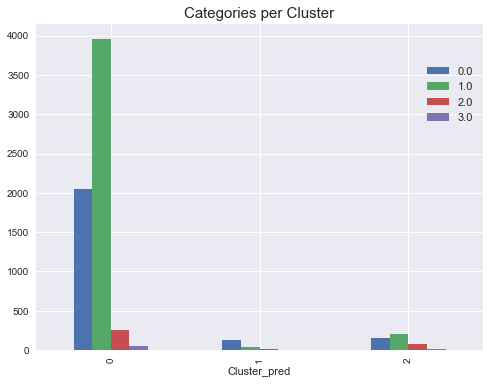

In [312]:
reasons_percent = clusters3.groupby('Cluster_pred')['categoria'].value_counts()
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Categories per Cluster', fontsize = 15); 

A continuació farem el mateix amb els usuaris a cada cluster.

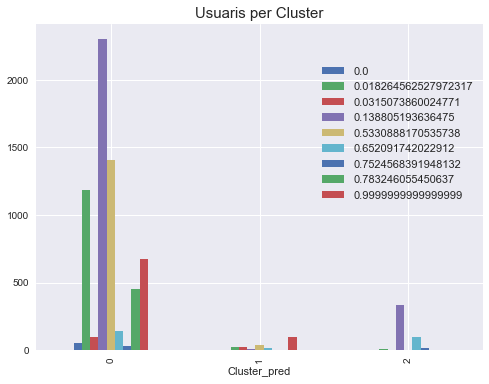

In [316]:
reasons_percent = clusters3.groupby('Cluster_pred')['status_user_id'].value_counts()
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Usuaris per Cluster', fontsize = 15); 

+ We notice that in the three scatterplots, cluster 2 seems to be the largest and cluster 0 the smallest, this may be because the data from cluster 0 is much more concentrated and in cluster 2 is more scattered.

+ The groups seem very well defined, especially in the scatterplot between Distance and ArrDelay. 

#### - Exercici 2
Classifica els diferents registres utilitzant l'algoritme de clustering jeràrquic.

In [319]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score

In [324]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Fem un nou dataframe amb les dades que hem escollit en l'exercici anterior per fer servir amb l'algoritme de clustering jeràrquic i poder comparar el resultat amb el K-means.

In [322]:
columnes = data_nm[['num_reactions','num_comments','num_shares' ]]
data_hc = DataFrame(columnes)

data_hc.head()

,num_reactions,num_comments,num_shares
0,0.112314,0.024393,0.076519
1,0.031847,0.000000,0.000000
2,0.048195,0.011243,0.016647
3,0.023567,0.000000,0.000000
4,0.045223,0.000000,0.000000


Creem el dendograma per trobar el nombre òptim de clústers.

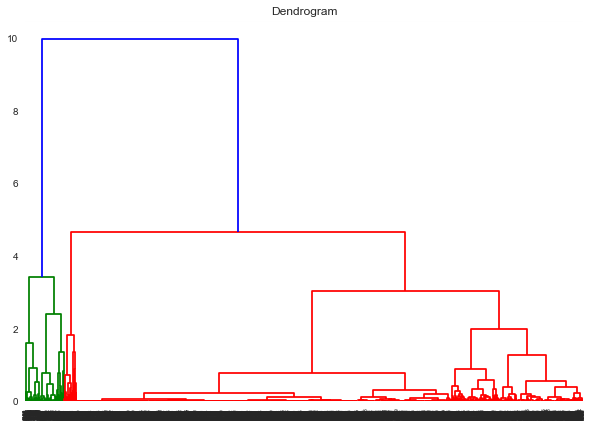

In [323]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_hc, method='ward'))

Segons el dendograma, el nombre òptim de clústers pot ser 2 o potser 3.
A continuació farem diferents proves amb els dos números de clusters, a veure quins resultats ens donen.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [338]:
# 2 clusters 
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_hc)

array([0, 0, 0, ..., 0, 0, 0])

In [339]:
# creem un diu dataframe i li afegim les dades del model amb 2 clusters.
data_hc_cluster = data_hc.copy()
data_hc_cluster['clusters_2'] = cluster.labels_

In [340]:
data_hc_cluster.head()

,num_reactions,num_comments,num_shares,clusters_2
0,0.112314,0.024393,0.076519,0
1,0.031847,0.000000,0.000000,0
2,0.048195,0.011243,0.016647,0
3,0.023567,0.000000,0.000000,0
4,0.045223,0.000000,0.000000,0


In [341]:
data_hc_cluster.clusters_2.value_counts()

0    6509
1     490
Name: clusters_2, dtype: int64

A continuació farem una serie de gràfiques on podrem veure els clusters comparant les variables que hem escollit.

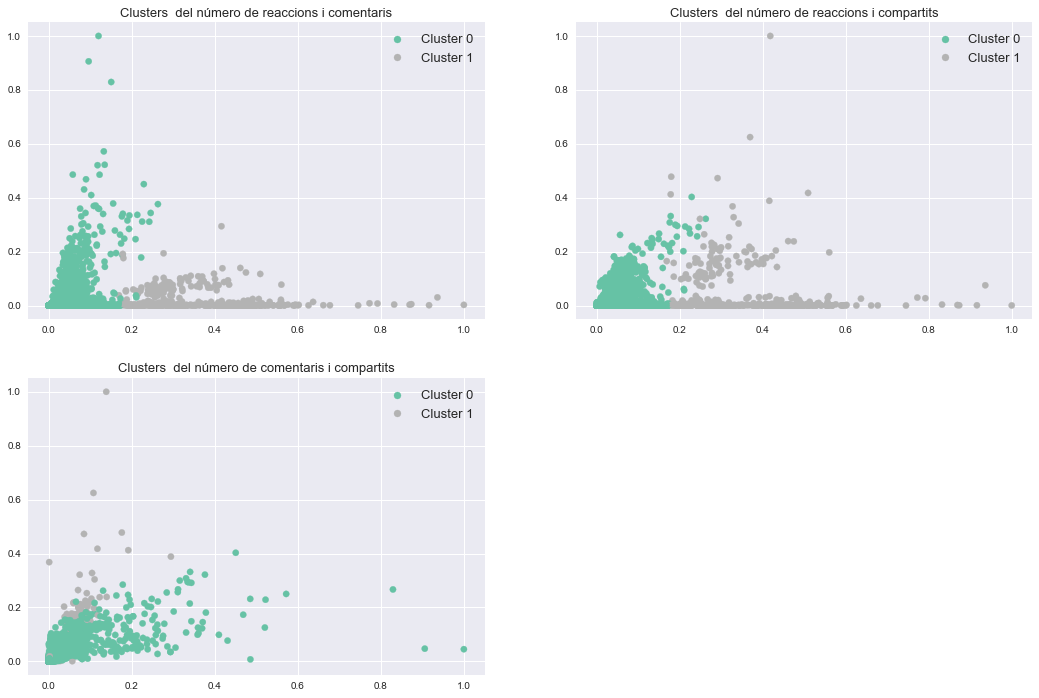

In [345]:
cm = plt.cm.get_cmap('Set2')

fig = plt.figure(figsize=(18,12))

plt.subplot(221)
plot1 = plt.scatter(x = data_hc_cluster['num_reactions'], y = data_hc_cluster['num_comments'], c= data_hc_cluster['clusters_2'],cmap=cm,s=40)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i comentaris', fontsize = 13)

plt.subplot(222)
plot2 = plt.scatter(x = data_hc_cluster['num_reactions'], y = data_hc_cluster['num_shares'], c= data_hc_cluster['clusters_2'],cmap=cm,s=40)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i compartits', fontsize = 13)

plt.subplot(223)
plot3 = plt.scatter(x = data_hc_cluster['num_comments'], y = data_hc_cluster['num_shares'], c= data_hc_cluster['clusters_2'],cmap=cm,s=40)
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1'], prop={'size': 13})
plt.title('Clusters  del número de comentaris i compartits', fontsize = 13)
plt.show()

En les dues primeres gràfiques podem veure que els  clústers estan ben definits, no sent així en quan a la tercera gràfica. 
Comprovem ara quin resultat ens dona si fem 3 clústers:

In [346]:
# 3 clusters 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_hc)

array([1, 1, 1, ..., 1, 1, 1])

In [347]:
# afegim les dades del model amb 3 clusters al nostre dataframe
data_hc_cluster['clusters_3'] = cluster.labels_

In [348]:
data_hc_cluster.head()

,num_reactions,num_comments,num_shares,clusters_2,clusters_3
0,0.112314,0.024393,0.076519,0,1
1,0.031847,0.000000,0.000000,0,1
2,0.048195,0.011243,0.016647,0,1
3,0.023567,0.000000,0.000000,0,1
4,0.045223,0.000000,0.000000,0,1


In [349]:
data_hc_cluster.clusters_3.value_counts()

1    6358
0     490
2     151
Name: clusters_3, dtype: int64

Com hem fet anteriorment, visualitzarem una serie de gràfiques on veurem els clusters comparant les variables que hem escollit.

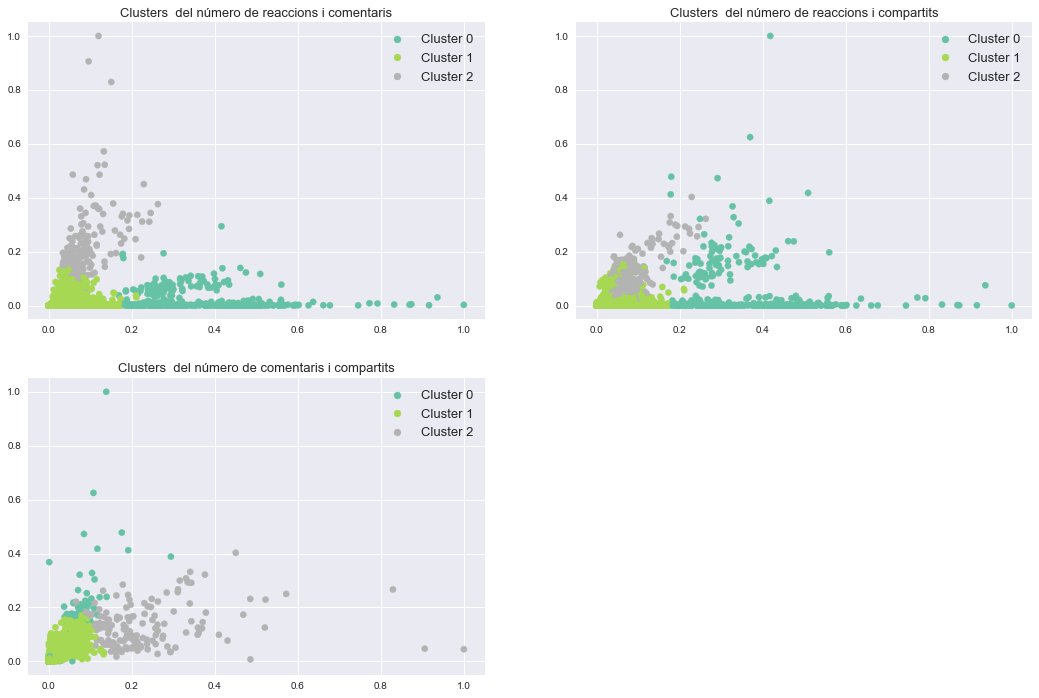

In [350]:
cm = plt.cm.get_cmap('Set2')

fig = plt.figure(figsize=(18,12))

plt.subplot(221)
plot1 = plt.scatter(x = data_hc_cluster['num_reactions'], y = data_hc_cluster['num_comments'], c= data_hc_cluster['clusters_3'],cmap=cm,s=40)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i comentaris', fontsize = 13)

plt.subplot(222)
plot2 = plt.scatter(x = data_hc_cluster['num_reactions'], y = data_hc_cluster['num_shares'], c= data_hc_cluster['clusters_3'],cmap=cm,s=40)
plt.legend(handles = plot2.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de reaccions i compartits', fontsize = 13)

plt.subplot(223)
plot3 = plt.scatter(x = data_hc_cluster['num_comments'], y = data_hc_cluster['num_shares'], c= data_hc_cluster['clusters_3'],cmap=cm,s=40)
plt.legend(handles = plot3.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.title('Clusters  del número de comentaris i compartits', fontsize = 13)
plt.show()

A continuació veurem els 3 clusters en una gràfica en tres dimensions.

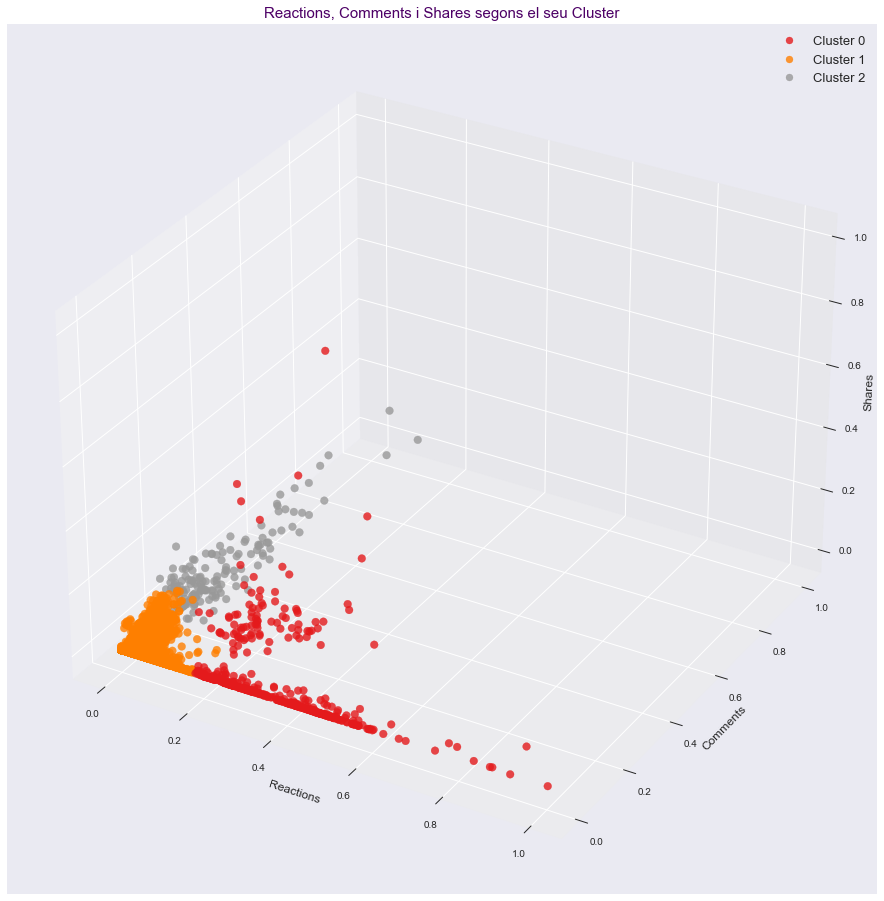

In [357]:
#cm = plt.cm.get_cmap('Set1')
fig = plt.figure(figsize= (16,16))

ax = fig.add_subplot(projection = '3d')
plot = ax.scatter(data_hc_cluster['num_reactions'], data_hc_cluster['num_comments'], data_hc_cluster['num_shares'], c = data_hc_cluster['clusters_3'], alpha = 0.8, s=60, cmap=cm)
plt.legend(handles = plot.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'], prop={'size': 13})
plt.xlabel("Reactions", fontsize = 12)
plt.ylabel("Comments", fontsize = 12)
ax.set_zlabel("Shares", fontsize = 12)
plt.title('Reactions, Comments i Shares segons el seu Cluster', fontsize= 15, color= '#4d0066')
plt.show()

Després de veure les gràfiques amb 2 i 3 clusters veiem que no hi ha una gran diferència en quant a la definició dels mateixos com per decidirnos per un o altre. així doncs farem un analisi de les dades a veure si podem treure més conclusions.

#### Resum estadístic amb 2 clusters

In [358]:
clusters_hc = clusters3.copy()

clusters_hc['predicted_clusters2'] = data_hc_cluster['clusters_2']
clusters_hc['predicted_clusters3'] = data_hc_cluster['clusters_3']

In [359]:
clusters_hc.head()

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred,predicted_clusters2,predicted_clusters3
0,0.138805,0.997546,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0,0,1
1,0.138805,0.997369,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0,0,1
2,0.138805,0.996911,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0,0,1
3,0.138805,0.996809,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0,0,1
4,0.138805,0.994916,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0,0,1


In [361]:
clusters_hc[clusters_hc['predicted_clusters2'] == 0].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred,predicted_clusters2,predicted_clusters3
count,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6509.00,6461.00,6509.00,6509.0,6509.00
mean,0.36,0.38,0.74,0.02,0.01,0.01,0.02,0.02,0.00,0.00,0.00,0.00,0.72,0.03,0.0,1.02
std,0.33,0.28,0.33,0.03,0.04,0.03,0.03,0.04,0.01,0.02,0.03,0.02,0.57,0.17,0.0,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00
25%,0.14,0.09,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00
50%,0.14,0.37,0.91,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,1.00
75%,0.53,0.53,0.95,0.04,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,1.00
max,1.00,1.00,1.00,0.26,1.00,0.40,0.21,0.43,0.21,0.65,1.00,1.00,3.00,2.00,0.0,2.00


In [362]:
clusters_hc[clusters_hc['predicted_clusters2'] == 1].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred,predicted_clusters2,predicted_clusters3
count,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,487.00,490.00,490.0,490.0
mean,0.29,0.43,0.63,0.35,0.02,0.04,0.34,0.08,0.04,0.02,0.01,0.01,0.87,1.90,1.0,0.0
std,0.25,0.11,0.24,0.13,0.03,0.09,0.14,0.17,0.11,0.07,0.04,0.03,0.79,0.39,0.0,0.0
min,0.02,0.05,0.21,0.17,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0
25%,0.14,0.39,0.46,0.25,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.0,0.0
50%,0.14,0.44,0.53,0.32,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.0,0.0
75%,0.65,0.47,0.96,0.44,0.01,0.01,0.44,0.02,0.02,0.00,0.00,0.00,1.00,2.00,1.0,0.0
max,1.00,1.00,1.00,1.00,0.29,1.00,1.00,1.00,1.00,1.00,0.73,0.26,3.00,2.00,1.0,0.0


In [363]:
clusters_hc['predicted_clusters2'] .value_counts()

0    6509
1     490
Name: predicted_clusters2, dtype: int64

A partir del resum de les dades estadístiques veurem quines caracteristiques té cada cluster:

Cluster 0:
+ Es el grup que té de lluny més observacions, un 90% del total.
+ La mitjana dels comentaris, reaccions i shares es molt baixa, encara que a diferència del K-means, cap arriba a 0.
+ Al 50% de les observacions els comentaris i shares son 0 mentres que les reaccions son molt baixes, sense arribar a 0. Igual que al K-means.

Cluster 1:
+ Es el segon grup més nombrós, a molta distància però del primer, amb un 6.5% del total.
+ La mitjana de les reaccions, comentaris i els shares son força superiors al del 0, especialment les reaccions. Donant uns resultats una mica més alts que amb el K-means.
+ Al 50% de les observacions en els comentaris i els shares el resultat es 0, tal i com succeeix al cluster 0. En quant a les reaccions el resultat es molt més alt que al cluster 0. Resultats gairbé identics que amb el K-means. 

#### Analisi gràfic dels clusters

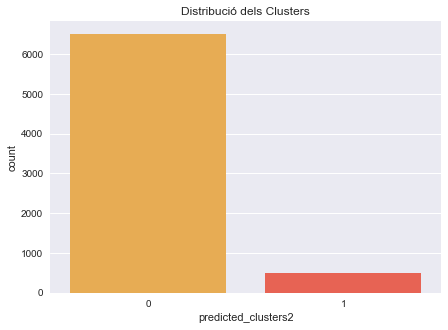

In [364]:
plt.figure(figsize = (7,5))
pal = ['#ffb13c', '#ff503c', '#698f3f']
pl = sns.countplot(x=clusters_hc['predicted_clusters2'], palette= pal)
pl.set_title("Distribució dels Clusters")
plt.show()

Com ja hem vist, la divisió de clústers no s'ha fet de manera equitativa. 

Ara veurem com es distribueixen les diferents categories en cada cluster.

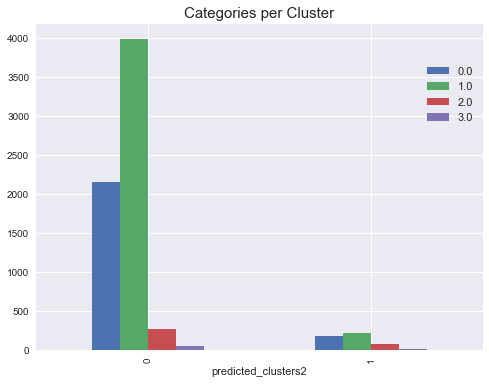

In [365]:
reasons_percent = clusters_hc.groupby('predicted_clusters2')['categoria'].value_counts()
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Categories per Cluster', fontsize = 15); 

A continuació farem el mateix amb els usuaris a cada cluster.

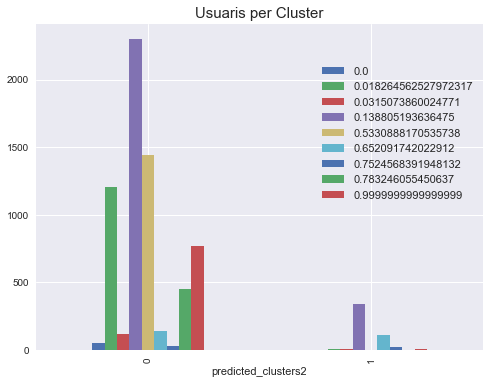

In [366]:
reasons_percent = clusters_hc.groupby('predicted_clusters2')['status_user_id'].value_counts()
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Usuaris per Cluster', fontsize = 15); 

#### Resum estadístic amb 3 clusters

In [368]:
clusters_hc[clusters_hc['predicted_clusters3'] == 0].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred,predicted_clusters2,predicted_clusters3
count,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,490.00,487.00,490.00,490.0,490.0
mean,0.29,0.43,0.63,0.35,0.02,0.04,0.34,0.08,0.04,0.02,0.01,0.01,0.87,1.90,1.0,0.0
std,0.25,0.11,0.24,0.13,0.03,0.09,0.14,0.17,0.11,0.07,0.04,0.03,0.79,0.39,0.0,0.0
min,0.02,0.05,0.21,0.17,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0
25%,0.14,0.39,0.46,0.25,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.0,0.0
50%,0.14,0.44,0.53,0.32,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.0,0.0
75%,0.65,0.47,0.96,0.44,0.01,0.01,0.44,0.02,0.02,0.00,0.00,0.00,1.00,2.00,1.0,0.0
max,1.00,1.00,1.00,1.00,0.29,1.00,1.00,1.00,1.00,1.00,0.73,0.26,3.00,2.00,1.0,0.0


In [369]:
clusters_hc[clusters_hc['predicted_clusters3'] == 1].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred,predicted_clusters2,predicted_clusters3
count,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6358.00,6321.00,6358.00,6358.0,6358.0
mean,0.35,0.38,0.74,0.02,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.73,0.01,0.0,1.0
std,0.33,0.28,0.33,0.03,0.01,0.02,0.03,0.03,0.01,0.02,0.03,0.02,0.57,0.08,0.0,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0
25%,0.14,0.09,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0
50%,0.14,0.37,0.91,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,1.0
75%,0.53,0.53,0.95,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,1.0
max,1.00,1.00,1.00,0.21,0.13,0.17,0.19,0.30,0.10,0.65,1.00,1.00,3.00,2.00,0.0,1.0


In [370]:
clusters_hc[clusters_hc['predicted_clusters3'] == 2].describe().round(2)

,status_user_id,status_post_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,categoria,Cluster_pred,predicted_clusters2,predicted_clusters3
count,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,140.00,151.0,151.0,151.0
mean,0.67,0.61,0.92,0.09,0.24,0.13,0.07,0.14,0.01,0.04,0.05,0.02,0.54,1.0,0.0,2.0
std,0.44,0.36,0.06,0.05,0.14,0.08,0.04,0.10,0.02,0.04,0.05,0.04,0.74,0.0,0.0,0.0
min,0.02,0.03,0.74,0.03,0.07,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,1.0,0.0,2.0
25%,0.03,0.09,0.87,0.06,0.15,0.07,0.04,0.06,0.00,0.02,0.02,0.00,0.00,1.0,0.0,2.0
50%,1.00,0.82,0.91,0.08,0.20,0.12,0.06,0.11,0.01,0.03,0.04,0.00,0.00,1.0,0.0,2.0
75%,1.00,0.84,0.97,0.11,0.27,0.17,0.08,0.20,0.02,0.06,0.06,0.03,1.00,1.0,0.0,2.0
max,1.00,0.99,1.00,0.26,1.00,0.40,0.21,0.43,0.21,0.27,0.45,0.16,3.00,1.0,0.0,2.0


In [371]:
clusters_hc['predicted_clusters3'] .value_counts()

1    6358
0     490
2     151
Name: predicted_clusters3, dtype: int64

A partir del resum de les dades estadístiques veurem quines caracteristiques té cada cluster:

Cluster 0:
+ Es el segon grup més nombrós, a molta distància però del primer, amb un 6.5% del total.
+ La mitjana de les reaccions és la més alta de tots 3 clusters, però els comentaris i els shares son inferiors als del cluster 1 i superiors al del 0.
+ Al 50% de les observacions en els comentaris i els shares el resultat es 0, tal i com succeeix al cluster 0. En quant a les reaccions té el resultat més elevat de tot 3 clusters.

Cluster 1:
+ Es el grup que té de lluny més observacions, un 90% del total.
+ La mitjana dels comentaris, reaccions i shares es molt baixa, sent 0 en quan als comentaris.
+ al 50% de les observacions les variables anteriorment esmentades el resultat es 0.

Cluster 2:
+ Aquest grup és el segon més petit amb diferència, amb un 2.8% de les observacions.
+ La mitjana dels comentaris, reaccions i shares es força més alta que al cluster anterior, i cap dona un resultat de 0.
+ Al 50% de les observacions cap de les variables dona 0.  

Com hem pogut comprovar, els resultats son gairebé identics als que ens dona l'algoritme K-means, només varia la posició  dels clusters.

#### Analisi gràfic dels clusters

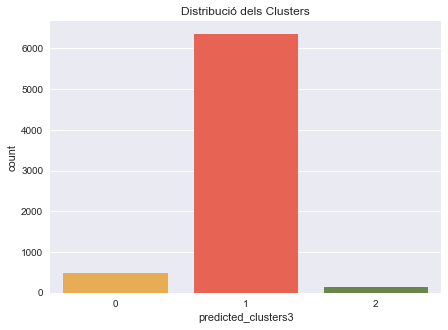

In [373]:
plt.figure(figsize = (7,5))
pal = ['#ffb13c', '#ff503c', '#698f3f']
pl = sns.countplot(x=clusters_hc['predicted_clusters3'], palette= pal)
pl.set_title("Distribució dels Clusters")
plt.show()

Com ja hem vist amb l'algoritme K-means', la divisió de clústers és igualment molt desproporcionada.

Ara veurem com es distribueixen les diferents categories en cada cluster.

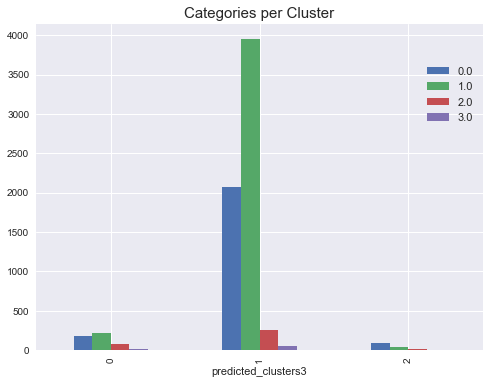

In [374]:
reasons_percent = clusters_hc.groupby('predicted_clusters3')['categoria'].value_counts()
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Categories per Cluster', fontsize = 15); 

A continuació farem el mateix amb els usuaris a cada cluster.

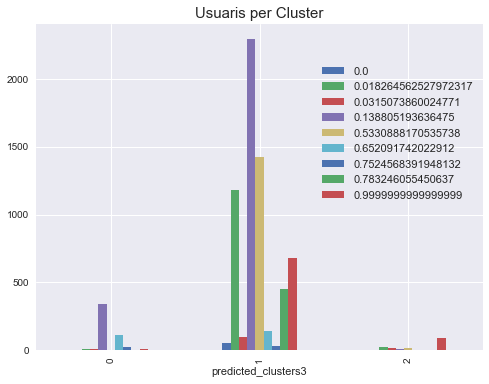

In [375]:
reasons_percent = clusters_hc.groupby('predicted_clusters3')['status_user_id'].value_counts()
reasons_percent.unstack(fill_value=0).plot(figsize = (8,6), kind = 'bar')
plt.legend(prop={'size': 11}, bbox_to_anchor=(1, 0.9))
plt.title('Usuaris per Cluster', fontsize = 15); 

Veiem que totes les dades tenen la mateixa distribució entre els 3 clusters que amb l'algoritme K-means.

#### Conclusions:
    
Encara que els resultats entre el model amb 2 i 3 clusters es molt semblant, escolliriem el de 2 clusters, doncs les dades estan lleugerament més equilibrades entre els clusters.

#### - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [376]:
from sklearn.metrics import silhouette_score

Treiem el coeficient Silhouette per un nombre de clusters comprés entre 2 y 10 per veure quin es el que ens dona la màxima puntuació.

In [378]:
silhouette_coefficients = []

kmeans_kwargs = {
            "init": "k-means++",
            "n_init": 10,
            "max_iter": 150,
            "random_state": 42,
            }

for k in range(2,11): 
    kmeans = KMeans(n_clusters= k, **kmeans_kwargs)
    kmeans.fit(data_hc)
    score = silhouette_score(data_hc, kmeans.labels_)
    silhouette_coefficients.append(score)

A continuació fem una gràfica amb els resultats obtinguts.

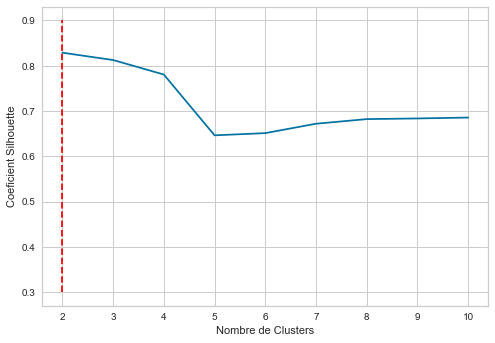

In [392]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Nombre de Clusters")
plt.ylabel("Coeficient Silhouette")
plt.vlines(x= 2, ymax = 0.9, ymin= 0.30,  color = 'red', linestyles = '--')
plt.grid(True)
plt.show()

El coeficient de silhouette torna a donar-nos el mateix resultat que les vegades anteriors: el nombre òptim de clusters és de 2.

In [387]:
from yellowbrick.cluster import SilhouetteVisualizer

Finalment farem unes gràfiques amb la puntuació silhouette amb Yellowbrick per comprovar visualment com quedarien amb diferents nombres de clusters. 

puntuació silhouette per k clusters:
2 : 0.829
3 : 0.813
4 : 0.781
5 : 0.646
Màxima puntuació silhouette per 2 clusters:  0.829


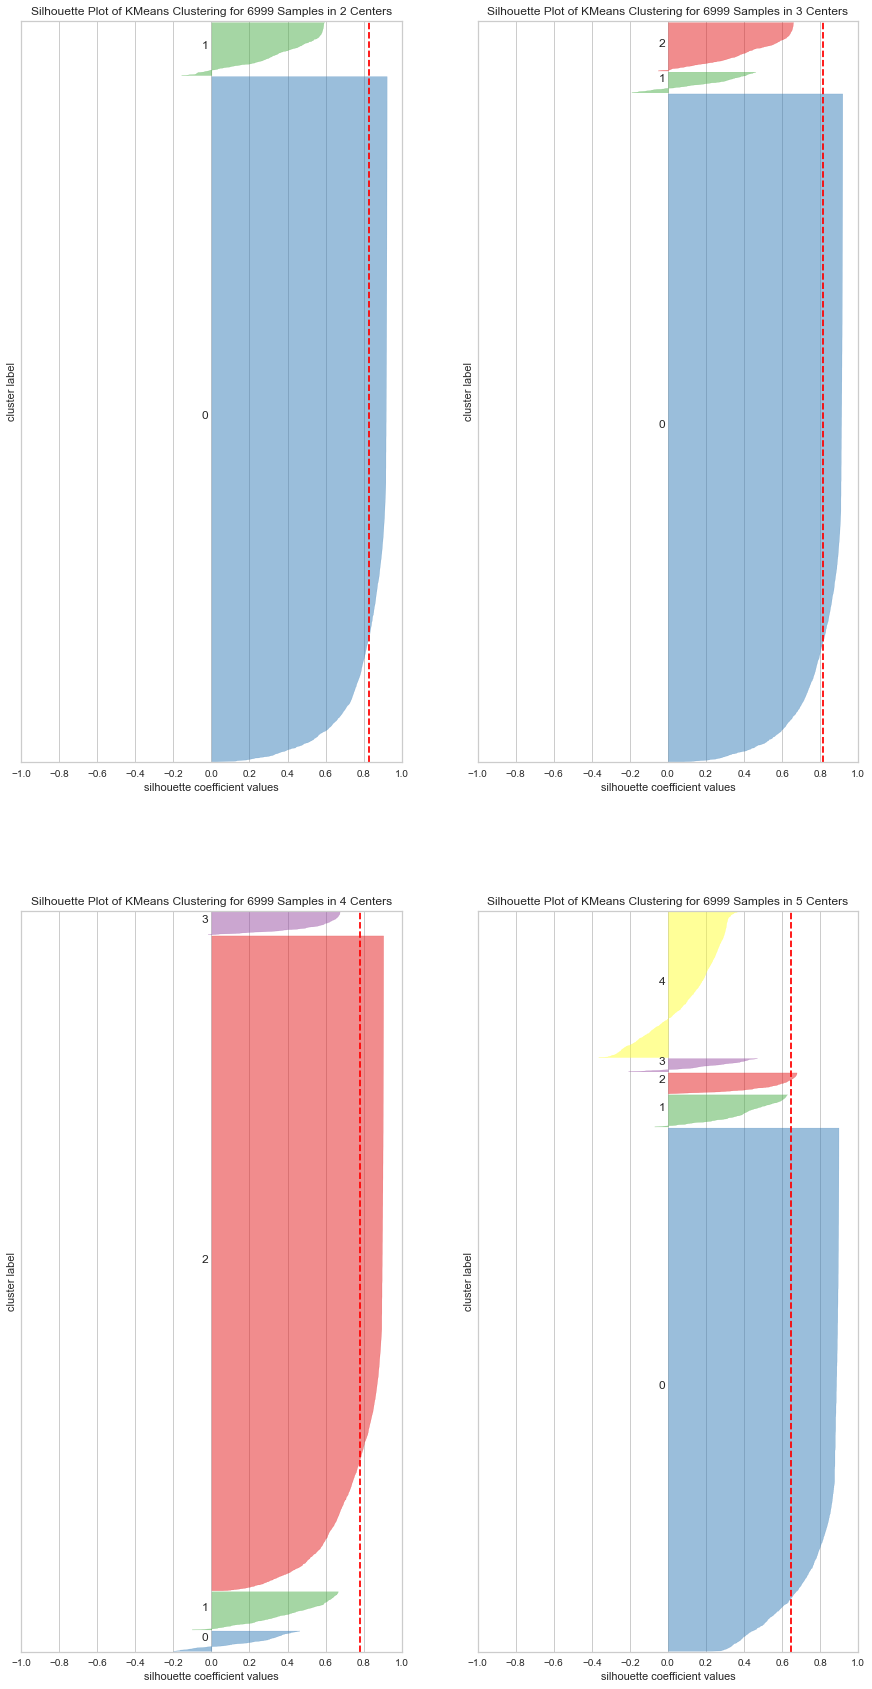

In [391]:
dict_score = dict()
fig, ax = plt.subplots(2, 2, figsize=(15,30))

for i in range(2,6):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod(i, 2)
    vis = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod], is_fitted=False)
    vis.fit(data_hc)
    vis.finalize()
    dict_score[i] = vis.silhouette_score_

print("puntuació silhouette per k clusters:")
_ = [print(k,":",f'{v:.3f}') for k,v in dict_score.items()]

K_sil_a3 = max(dict_score, key=dict_score.get)          # optimal clusters
sil_opt_a3 = dict_score[K_sil_a3]                       # optimal (maximal) silhouette score
print("Màxima puntuació silhouette per", f'{K_sil_a3:.0f} clusters: ', f'{sil_opt_a3:.3f}')

Aquestes últimes gràfiques venen a demostrar que realment la millor opció es escollir 2 clusters per al nostre conjunts de dades.